In [ ]:
import sqlite3
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt


Path("student_grades.db").touch()
connection =sqlite3.connect("student_grades.db")
cursor = connection.cursor()

cursor.execute(
    """CREATE TABLE IF NOT EXISTS students (
        student_id INTEGER PRIMARY KEY AUTOINCREMENT,
        first_name TEXT,
        last_name TEXT
        ); """
)

cursor.execute(
    """CREATE TABLE IF NOT EXISTS grades (
        grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
        student_id INT,
        subject TEXT,
        grade INT,
        FOREIGN KEY (student_id) REFERENCES students(student_id)
        );
    """
)

student_data = [
    ("Randal", "Woodward"),
    ("Mauricio", "Fisher"),
    ("Miguel", "Horne"),
    ("Carlene", "Mcclure"),
    ("Lynne", "Richard")
]

cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?);
''', student_data)

grade_data = [
    (1, "Math", 90),
    (1, "English", 95),
    (1, "History", 98),
    (2, "Math", 80),
    (2, "English", 85),
    (2, "History", 88),
    (3, "Math", 90),
    (3, "English", 90),
    (3, "History", 90),
    (4, "Math", 89),
    (4, "English", 91),
    (4, "History", 93),
    (5, "Math", 88),
    (5, "English", 99),
    (5, "History", 90)
]

cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?,?);
''', grade_data)





In [7]:
#QUERY 1: Retrieve all students' names and their grades.
cursor.execute("""SELECT students.first_name, students.last_name, grades.subject, grades.grade 
FROM students
JOIN grades ON grades.student_id = students.student_id;
""")
rows= cursor.fetchall()

print("Student Names and Grades")
for row in rows:
    print(row)

Student Names and Grades
('Randal', 'Woodward', 'Math', 90)
('Randal', 'Woodward', 'English', 95)
('Randal', 'Woodward', 'History', 98)
('Mauricio', 'Fisher', 'Math', 80)
('Mauricio', 'Fisher', 'English', 85)
('Mauricio', 'Fisher', 'History', 88)
('Miguel', 'Horne', 'Math', 90)
('Miguel', 'Horne', 'English', 90)
('Miguel', 'Horne', 'History', 90)
('Carlene', 'Mcclure', 'Math', 89)
('Carlene', 'Mcclure', 'English', 91)
('Carlene', 'Mcclure', 'History', 93)
('Lynne', 'Richard', 'Math', 88)
('Lynne', 'Richard', 'English', 99)
('Lynne', 'Richard', 'History', 90)


In [9]:
#QUERY 2: Find the average grade for each student.
cursor.execute("""SELECT students.first_name, students.last_name, AVG (grades.grade) AS "Grade Average"
FROM grades
JOIN students ON grades.student_id = students.student_id
GROUP BY grades.student_id
;
""")
rows= cursor.fetchall()

print("Average Grade For Each Student")
for row in rows:
    print(row)

Average Grade For Each Student
('Randal', 'Woodward', 94.33333333333333)
('Mauricio', 'Fisher', 84.33333333333333)
('Miguel', 'Horne', 90.0)
('Carlene', 'Mcclure', 91.0)
('Lynne', 'Richard', 92.33333333333333)


In [11]:
#QUERY 3: Find the student with the highest average grade.
cursor.execute("""SELECT students.first_name, students.last_name, AVG (grades.grade) AS "Grade Average" 
FROM grades
JOIN students ON grades.student_id = students.student_id
GROUP BY grades.student_id
ORDER BY "Grade Average" DESC
LIMIT 1
;
""")

rows= cursor.fetchall()

print("Student with Highest Average Grade")
print (rows)

Student with Highest Average Grade
[('Randal', 'Woodward', 94.33333333333333)]


In [13]:
#QUERY 4: Find the average grade for the Math subject.
cursor.execute("""SELECT subject, AVG (grade) AS "Math Average" 
FROM grades
WHERE subject = "Math"
;
""")
rows= cursor.fetchall()

print("Average Grade for the Math Subject")
print (rows)

Average Grade for the Math Subject
[('Math', 87.4)]


In [19]:
#QUERY 5: List all students who scored above 90 in any subject.
cursor.execute("""SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM grades
JOIN students ON grades.student_id = students.student_id
WHERE grades.grade > 90
;
""")

rows= cursor.fetchall()

print("Students Who Scored Above 90 in Any Subject")
for row in rows:
    print(row)

Students Who Scored Above 90 in Any Subject
('Randal', 'Woodward', 'English', 95)
('Randal', 'Woodward', 'History', 98)
('Carlene', 'Mcclure', 'English', 91)
('Carlene', 'Mcclure', 'History', 93)
('Lynne', 'Richard', 'English', 99)


In [21]:
#LOAD DATA INTO PANDAS
#1.Use Pandas to load the data from the students and grades tables into DataFrames.
df_students = pd.read_sql_query("""SELECT * FROM students""", connection)
df_grades = pd.read_sql_query("""SELECT * FROM grades""", connection)

In [23]:
#2. Use JOIN queries to combine the data from both tables into a single DataFrame that includes each student's name, subject, and grade.
df_students_and_grades = pd.read_sql_query("""SELECT students.first_name, students.last_name, grades.subject, grades.grade 
FROM students
JOIN grades ON grades.student_id = students.student_id;""", connection)
df_students_and_grades

,first_name,last_name,subject,grade
0,Randal,Woodward,Math,90
1,Randal,Woodward,English,95
2,Randal,Woodward,History,98
3,Mauricio,Fisher,Math,80
4,Mauricio,Fisher,English,85
5,Mauricio,Fisher,History,88
6,Miguel,Horne,Math,90
7,Miguel,Horne,English,90
8,Miguel,Horne,History,90
9,Carlene,Mcclure,Math,89


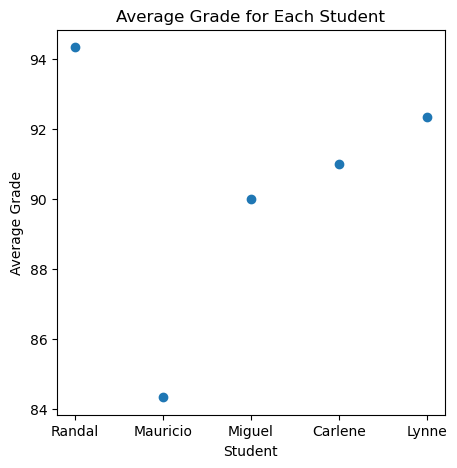

In [25]:
#3. Visualize the data with Matplotlib:
#a. Plot the average grades for each student.
import matplotlib.pyplot as plt

df_students_and_grades = pd.read_sql_query("""SELECT students.first_name, students.last_name, grades.subject, AVG(grades.grade) as "Average Grade" 
FROM students
JOIN grades ON grades.student_id = students.student_id
GROUP BY grades.student_id
;""", connection)

plt.figure(figsize=(5,5))
plt.scatter(df_students_and_grades['first_name'], df_students_and_grades["Average Grade"])
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Student')
plt.show()

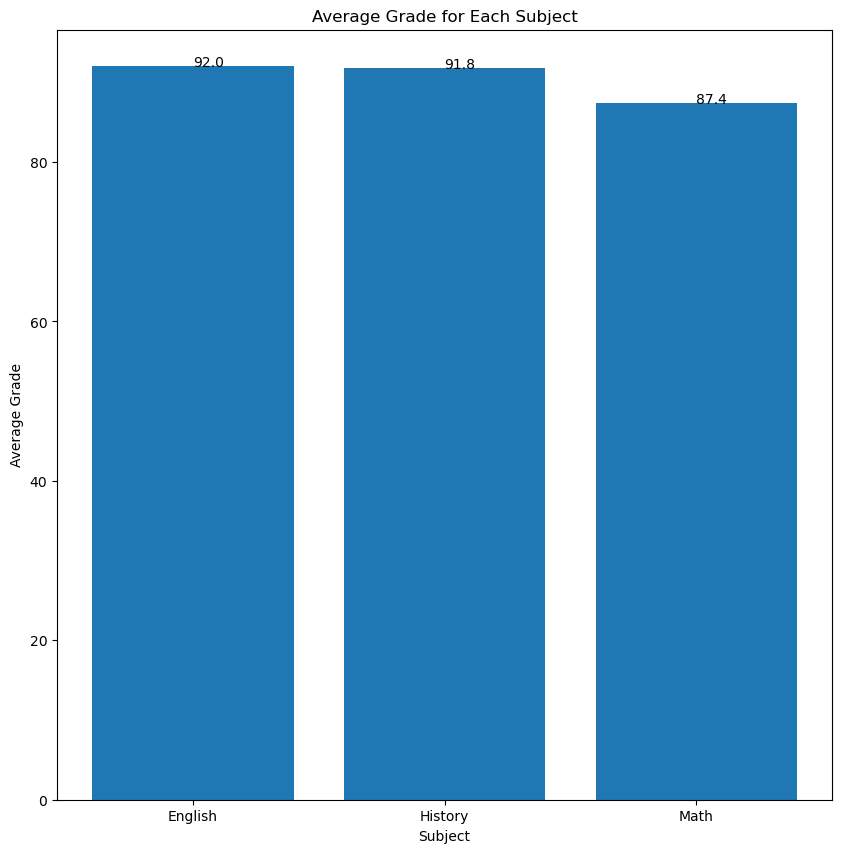

In [41]:
#3. Visualize the data with Matplotlib:
#b. Create a bar chart showing the average grade for each subject.
df_average_grades_subject = pd.read_sql_query("""SELECT subject, AVG(grade) as "Average Grade" 
FROM grades
GROUP BY subject
;""", connection)

x=df_average_grades_subject['subject']
y=df_average_grades_subject["Average Grade"]

plt.figure(figsize=(10,10))
plt.bar(x, y)
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Subject')

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x, y)


plt.show()